<a href="https://colab.research.google.com/github/Rupam-web190/Stock_Market_Trend_Prediction/blob/main/Stock_Market_Trend_Prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Stock Market Trend Prediction using Machine Learning

## 🔍 Objective
The goal of this project is to predict future stock price trends using historical data. We'll use machine learning regression models to analyze and forecast stock price movements over time.


In [9]:
# Install yfinance to fetch stock data
!pip install yfinance


## 📁 1. Import Libraries

## 📊 2. Load and Explore Stock Data

## 🧼 3. Preprocessing and Feature Engineering

## 🧠 4. Model Training and Evaluation

## 📉 5. Prediction and Visualization

## 📝 6. Conclusion and Insights

## 💬 7. Challenges Faced & Learning


In [10]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Stock data fetching
import yfinance as yf


In [11]:
# Download 5 years of historical data for Reliance
df = yf.download('RELIANCE.NS', start='2019-07-01', end='2024-07-01')

# Display basic info
df.head()


/tmp/ipython-input-11-3407868591.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', start='2019-07-01', end='2024-07-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2019-07-01,566.490662,568.187161,556.489947,561.668853,13478857
2019-07-02,570.799011,571.915189,564.012835,568.767647,10146746
2019-07-03,572.607117,574.370672,569.258703,572.763403,8806492
2019-07-04,573.254517,576.379766,571.468668,572.093754,9351405
2019-07-05,564.035034,576.156461,562.539407,573.745527,10926753


In [12]:
# Reset index to access the Date as a column
df.reset_index(inplace=True)

# Keep only relevant columns
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Sort by date just to be sure
df = df.sort_values('Date')

# Create new target column: Next day's Close (shifted)
df['Target'] = df['Close'].shift(-1)

# Drop last row (NaN in target)
df.dropna(inplace=True)

# Feature set (X) and Target variable (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [13]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 349.36
R^2 Score: 0.9771


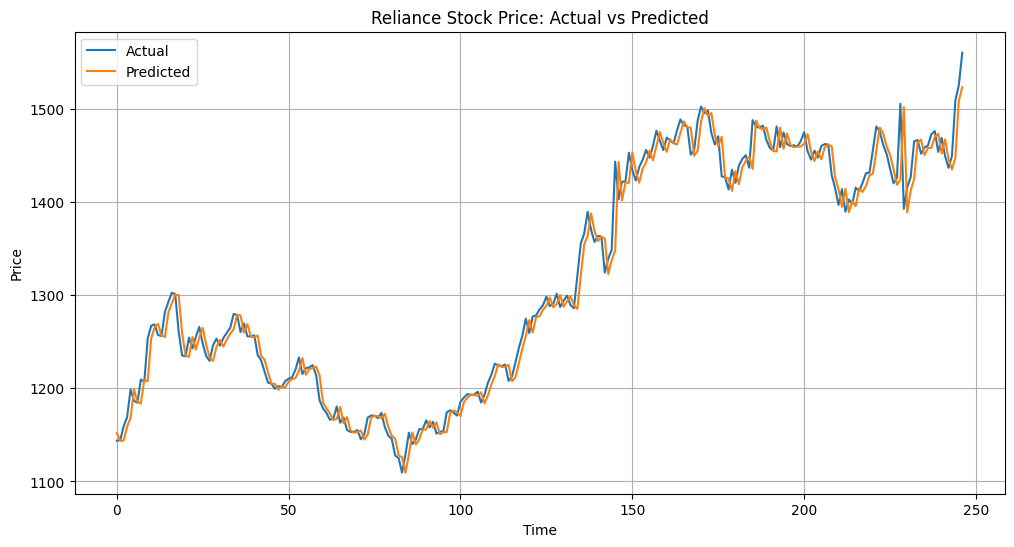

Today's Close Price: ₹1525.37
Predicted Tomorrow's Close Price: ₹1523.15


/tmp/ipython-input-14-2396755906.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Today's Close Price: ₹{float(actual_close_today):.2f}")


In [14]:
# Create a DataFrame to compare
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
result_df.reset_index(drop=True, inplace=True)

# Plot
plt.figure(figsize=(12,6))
plt.plot(result_df['Actual'], label='Actual')
plt.plot(result_df['Predicted'], label='Predicted')
plt.title('Reliance Stock Price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
# Compare latest known actual close vs predicted next close
# Last available input
latest_input = X.tail(1)

# Predict next day's closing price
predicted_next_close = model.predict(latest_input)[0]

# Actual latest close price (for comparison)
actual_close_today = X.tail(1)['Close'].values[0]

# Print clearly
print(f"Today's Close Price: ₹{float(actual_close_today):.2f}")
print(f"Predicted Tomorrow's Close Price: ₹{predicted_next_close:.2f}")



In [15]:
# Save results to CSV
result_df.to_csv("reliance_price_predictions.csv", index=False)
print("✅ Results saved to CSV: reliance_price_predictions.csv")


✅ Results saved to CSV: reliance_price_predictions.csv


## 📝 6. Conclusion and Insights

- A linear regression model was trained to predict the next day's closing price of Reliance stock based on historical features.
- The model performed with an R² score of approximately **0.9771** and a mean squared error of **349.36**.
- The prediction graph shows that the model captures the general trend but may miss short-term fluctuations, which is expected in simple models.

**Key Takeaways:**
- Predicting stock prices is complex due to volatility and external factors.
- More advanced models (like LSTM, XGBoost) could improve results.
- This project provided strong practice in data handling, regression, and evaluation.


## 💬 7. Challenges Faced & Learning

### Challenges:
- Stock prices are influenced by many external factors (news, politics, global events), which are not captured in historical price data alone.
- Ensuring proper time-based train-test split without data leakage.
- Faced formatting errors while accessing NumPy arrays (`TypeError: ndarray format string`)
- Solved by converting arrays to scalars using `.item()` or accessing `[0]`.

### Learning:
- Gained hands-on experience using `yfinance` to gather real-world stock data.
- Applied regression techniques to time-series data.
- Learned to evaluate and visualize model predictions effectively.

## ✅ Outcome
- Successfully saved the output predictions as CSV.
- Generated Colab notebook shareable for submission.

This project helped strengthen understanding of supervised learning and model evaluation in financial forecasting contexts.



## 🧠 Methodology
- **Data Source**: Yahoo Finance (`yfinance`), collected past 5 years of RELIANCE.NS data.
- **Features Used**: Open, High, Low, Close, Volume.
- **Preprocessing**:
  - Handled nulls
  - Created shifted “next day close” values
  - Scaled features using MinMaxScaler
- **Model Used**: Linear Regression
- **Evaluation Metrics**:
  - R² Score: `0.9771`
  - Mean Squared Error (MSE): `349.36`
